In [1]:
#United 

In [2]:
#Dependencies
%matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import sem
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Read in csv
csv_path_1= "United-LGA.csv"

united_lga_df=pd.read_csv(csv_path_1, header=7)

united_lga_df.head()

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,UA,1/1/17,119.0,N36280,IAH,16:50,16:51,262.0,255.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UA,1/1/17,343.0,N424UA,DEN,6:20,6:16,260.0,246.0,-4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UA,1/1/17,463.0,N832UA,ORD,8:00,7:55,155.0,141.0,-5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UA,1/1/17,509.0,N17245,DEN,18:05,17:59,277.0,257.0,-6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UA,1/1/17,519.0,N474UA,ORD,9:00,9:05,163.0,136.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Remove unnecessary columns
clean_united_lga_df=united_lga_df.drop(['Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27','Unnamed: 28', 'Unnamed: 29'], axis=1)
clean_united_lga_df

,Carrier Code,Date (MM/DD/YYYY),Flight Number,Tail Number,Destination Airport,Scheduled departure time,Actual departure time,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Wheels-off time,Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,1/1/17,119.0,N36280,IAH,16:50,16:51,262.0,255.0,1.0,17:08,17.0,0.0,0.0,0.0,0.0,0.0
1,UA,1/1/17,343.0,N424UA,DEN,6:20,6:16,260.0,246.0,-4.0,6:28,12.0,0.0,0.0,0.0,0.0,0.0
2,UA,1/1/17,463.0,N832UA,ORD,8:00,7:55,155.0,141.0,-5.0,8:06,11.0,0.0,0.0,0.0,0.0,0.0
3,UA,1/1/17,509.0,N17245,DEN,18:05,17:59,277.0,257.0,-6.0,18:16,17.0,0.0,0.0,0.0,0.0,0.0
4,UA,1/1/17,519.0,N474UA,ORD,9:00,9:05,163.0,136.0,5.0,9:17,12.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24558,UA,12/31/18,2078.0,N466UA,IAH,13:49,13:45,248.0,242.0,-4.0,13:55,10.0,0.0,0.0,0.0,0.0,0.0
24559,UA,12/31/18,2098.0,N17244,IAH,7:42,7:39,239.0,227.0,-3.0,7:50,11.0,0.0,0.0,0.0,0.0,0.0
24560,UA,12/31/18,2140.0,N437UA,DEN,10:10,10:08,278.0,277.0,-2.0,10:24,16.0,0.0,0.0,0.0,0.0,0.0
24561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Create new Dataframe 
summary_united=clean_united_lga_df[["Carrier Code", "Date (MM/DD/YYYY)", "Destination Airport", 
                                     "Scheduled departure time", "Actual departure time", 
                                     "Departure delay (Minutes)", "Delay Carrier (Minutes)",
                                     "Delay Weather (Minutes)", "Delay National Aviation System (Minutes)",
                                     "Delay Security (Minutes)", "Delay Late Aircraft Arrival (Minutes)"]] 
summary_united

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,1/1/17,IAH,16:50,16:51,1.0,0.0,0.0,0.0,0.0,0.0
1,UA,1/1/17,DEN,6:20,6:16,-4.0,0.0,0.0,0.0,0.0,0.0
2,UA,1/1/17,ORD,8:00,7:55,-5.0,0.0,0.0,0.0,0.0,0.0
3,UA,1/1/17,DEN,18:05,17:59,-6.0,0.0,0.0,0.0,0.0,0.0
4,UA,1/1/17,ORD,9:00,9:05,5.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24558,UA,12/31/18,IAH,13:49,13:45,-4.0,0.0,0.0,0.0,0.0,0.0
24559,UA,12/31/18,IAH,7:42,7:39,-3.0,0.0,0.0,0.0,0.0,0.0
24560,UA,12/31/18,DEN,10:10,10:08,-2.0,0.0,0.0,0.0,0.0,0.0
24561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Remove NaN values 
lga_summary_united=summary_united.dropna()
lga_summary_united

,Carrier Code,Date (MM/DD/YYYY),Destination Airport,Scheduled departure time,Actual departure time,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
0,UA,1/1/17,IAH,16:50,16:51,1.0,0.0,0.0,0.0,0.0,0.0
1,UA,1/1/17,DEN,6:20,6:16,-4.0,0.0,0.0,0.0,0.0,0.0
2,UA,1/1/17,ORD,8:00,7:55,-5.0,0.0,0.0,0.0,0.0,0.0
3,UA,1/1/17,DEN,18:05,17:59,-6.0,0.0,0.0,0.0,0.0,0.0
4,UA,1/1/17,ORD,9:00,9:05,5.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
24556,UA,12/31/18,ORD,10:00,9:53,-7.0,0.0,0.0,0.0,0.0,0.0
24557,UA,12/31/18,IAH,10:00,10:02,2.0,0.0,0.0,0.0,0.0,0.0
24558,UA,12/31/18,IAH,13:49,13:45,-4.0,0.0,0.0,0.0,0.0,0.0
24559,UA,12/31/18,IAH,7:42,7:39,-3.0,0.0,0.0,0.0,0.0,0.0


In [7]:
lga_summary_united.count()

Carrier Code                                24561
Date (MM/DD/YYYY)                           24561
Destination Airport                         24561
Scheduled departure time                    24561
Actual departure time                       24561
Departure delay (Minutes)                   24561
Delay Carrier (Minutes)                     24561
Delay Weather (Minutes)                     24561
Delay National Aviation System (Minutes)    24561
Delay Security (Minutes)                    24561
Delay Late Aircraft Arrival (Minutes)       24561
dtype: int64

In [8]:
lga_summary_united_date=lga_summary_united.groupby(['Date (MM/DD/YYYY)'], as_index=False).agg({'Departure delay (Minutes)':'sum'})
lga_summary_united_date

,Date (MM/DD/YYYY),Departure delay (Minutes)
0,1/1/17,87.0
1,1/1/18,272.0
2,1/1/19,282.0
3,1/10/17,398.0
4,1/10/18,-26.0
...,...,...
998,9/8/18,-107.0
999,9/8/19,-177.0
1000,9/9/17,-93.0
1001,9/9/18,-4.0


In [9]:
united_date_delay_df=pd.DataFrame(lga_summary_united_date)

In [10]:
united_date_delay_df['Date']=pd.to_datetime(united_date_delay_df['Date (MM/DD/YYYY)'])

In [12]:
united_date_delay_unsort=united_date_delay_df.drop(['Date (MM/DD/YYYY)'], axis=1)

In [13]:
united_date_delay_sort=united_date_delay_unsort.sort_values(by=['Departure delay (Minutes)'], ascending=False)
united_date_delay_sort

,Departure delay (Minutes),Date
752,4557.0,2018-07-17
886,3295.0,2017-08-03
853,3278.0,2017-08-02
836,3180.0,2018-08-14
675,2978.0,2019-06-20
...,...,...
335,-198.0,2018-02-27
963,-199.0,2019-09-24
197,-218.0,2017-11-29
561,-226.0,2019-05-14


In [14]:
final_united_date=united_date_delay_sort.head(20)

In [16]:
date=united_date_delay_sort.head(1)

In [17]:
date.iloc[0]['Date']

Timestamp('2018-07-17 00:00:00')

In [18]:
x_axis=np.arange(len(final_united_date))
tick_location=[value for value in x_axis]
y_axis=final_united_date['Departure delay (Minutes)']

([<matplotlib.axis.XTick at 0x1a25b3b610>,
 <a list of 20 Text xticklabel objects>)

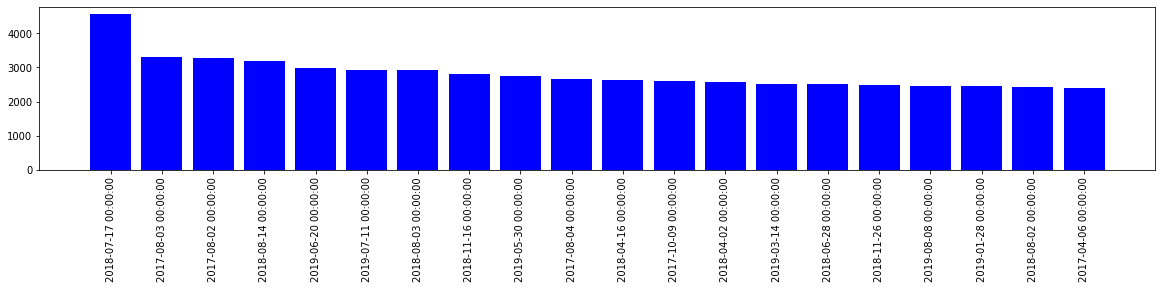

In [20]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align='center')
plt.xticks(tick_location, final_united_date['Date'], rotation='vertical')

In [22]:
lga_united_check_reason=lga_summary_united.groupby(['Date (MM/DD/YYYY)'],as_index=False).sum()

In [23]:
lga_united_check_reason['Date']=pd.to_datetime(lga_united_check_reason['Date (MM/DD/YYYY)'])
lga_united_check_reason

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,1/1/17,87.0,12.0,0.0,16.0,0.0,59.0,2017-01-01
1,1/1/18,272.0,52.0,0.0,0.0,0.0,0.0,2018-01-01
2,1/1/19,282.0,274.0,0.0,0.0,0.0,88.0,2019-01-01
3,1/10/17,398.0,0.0,0.0,189.0,0.0,213.0,2017-01-10
4,1/10/18,-26.0,0.0,13.0,74.0,0.0,17.0,2018-01-10
...,...,...,...,...,...,...,...,...
998,9/8/18,-107.0,0.0,0.0,0.0,0.0,0.0,2018-09-08
999,9/8/19,-177.0,0.0,0.0,65.0,0.0,0.0,2019-09-08
1000,9/9/17,-93.0,0.0,0.0,0.0,0.0,0.0,2017-09-09
1001,9/9/18,-4.0,9.0,0.0,104.0,0.0,64.0,2018-09-09


In [24]:
lga_united_check_reason_1=lga_united_check_reason.loc[lga_united_check_reason["Date"]==date.iloc[0]['Date']]
lga_united_check_reason_1

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
752,7/17/18,4557.0,36.0,1452.0,864.0,0.0,2562.0,2018-07-17


In [26]:
 lga_united_check_reason_1.iloc[0][0]

'7/17/18'

In [27]:
d=lga_united_check_reason_1.iloc[0].count()

In [28]:
lga_united_check_reason_1.columns[5].split(" ")[0]

'Delay'

In [29]:
value=[]
heading=[]

In [30]:
for i in range(d-1):
    if lga_united_check_reason_1.columns[i].split(" ")[0]== "Delay":
        print(lga_united_check_reason_1.columns[i])
        value.append(lga_united_check_reason_1.iloc[0][i])
        heading.append(lga_united_check_reason_1.columns[i])

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [31]:
max(value)

2562.0

In [32]:
value.index(max(value))

4

In [33]:
reason=heading[value.index(max(value))]

In [34]:
print("Reason for delay is {}".format(reason))

Reason for delay is Delay Late Aircraft Arrival (Minutes)


Text(0.5, 1.0, 'Date 2018-07-17, main reason for delay is Late')

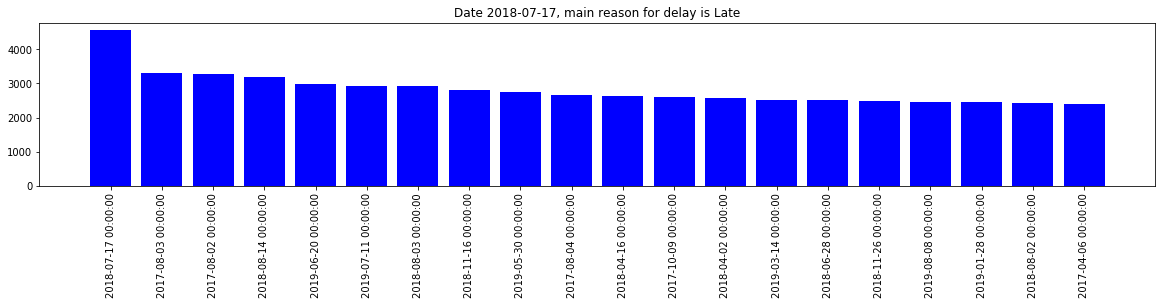

In [35]:
plt.figure(figsize=(20,3))
plt.bar(x_axis, y_axis, color='b', alpha=1, align="center")
plt.xticks(tick_location, final_united_date['Date'], rotation="vertical")
plt.title("Date {}, main reason for delay is {}".format(str(date.iloc[0]['Date']).split(" ")[0], reason.split(" ")[1]))

In [36]:
date1=united_date_delay_sort.head(3)
date1

,Departure delay (Minutes),Date
752,4557.0,2018-07-17
886,3295.0,2017-08-03
853,3278.0,2017-08-02


In [37]:
lga_united_check_reason_1=lga_united_check_reason.loc[lga_united_check_reason["Date"]==date1.iloc[2]['Date']]
lga_united_check_reason_1

,Date (MM/DD/YYYY),Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
853,8/2/17,3278.0,34.0,507.0,4.0,0.0,2490.0,2017-08-02


In [38]:
#Group by Date & Destination Airport

In [39]:
lga_united_dest=lga_summary_united.groupby(['Date (MM/DD/YYYY)', 'Destination Airport'], as_index=False).agg({'Departure delay (Minutes)': 'sum'})

In [40]:
date_destination_delay=pd.DataFrame(lga_united_dest)
date_destination_delay

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes)
0,1/1/17,DEN,5.0
1,1/1/17,IAH,98.0
2,1/1/17,ORD,-16.0
3,1/1/18,DEN,5.0
4,1/1/18,IAH,110.0
...,...,...,...
3035,9/9/18,IAH,74.0
3036,9/9/18,ORD,-54.0
3037,9/9/19,DEN,79.0
3038,9/9/19,IAH,-9.0


In [41]:
date_destination_delay['Date']=pd.to_datetime(date_destination_delay['Date (MM/DD/YYYY)'])
date_destination_delay

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Date
0,1/1/17,DEN,5.0,2017-01-01
1,1/1/17,IAH,98.0,2017-01-01
2,1/1/17,ORD,-16.0,2017-01-01
3,1/1/18,DEN,5.0,2018-01-01
4,1/1/18,IAH,110.0,2018-01-01
...,...,...,...,...
3035,9/9/18,IAH,74.0,2018-09-09
3036,9/9/18,ORD,-54.0,2018-09-09
3037,9/9/19,DEN,79.0,2019-09-09
3038,9/9/19,IAH,-9.0,2019-09-09


In [42]:
date_destination_delay_unsort=date_destination_delay.drop(['Date (MM/DD/YYYY)'], axis=1)
date_destination_delay_unsort

,Destination Airport,Departure delay (Minutes),Date
0,DEN,5.0,2017-01-01
1,IAH,98.0,2017-01-01
2,ORD,-16.0,2017-01-01
3,DEN,5.0,2018-01-01
4,IAH,110.0,2018-01-01
...,...,...,...
3035,IAH,74.0,2018-09-09
3036,ORD,-54.0,2018-09-09
3037,DEN,79.0,2019-09-09
3038,IAH,-9.0,2019-09-09


In [43]:
date_destination_delay_sort=date_destination_delay_unsort.sort_values(by=['Departure delay (Minutes)'], ascending=False)

In [44]:
date_destination_delay_sort_plot=date_destination_delay_sort.head(10)

In [45]:
lga_check_dest_reason=lga_summary_united.groupby(['Date (MM/DD/YYYY)', 'Destination Airport'], as_index=False).sum()

In [46]:
lga_check_dest_reason['Date']=pd.to_datetime(lga_check_dest_reason['Date (MM/DD/YYYY)'])
lga_check_dest_reason

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
0,1/1/17,DEN,5.0,0.0,0.0,16.0,0.0,0.0,2017-01-01
1,1/1/17,IAH,98.0,12.0,0.0,0.0,0.0,59.0,2017-01-01
2,1/1/17,ORD,-16.0,0.0,0.0,0.0,0.0,0.0,2017-01-01
3,1/1/18,DEN,5.0,0.0,0.0,0.0,0.0,0.0,2018-01-01
4,1/1/18,IAH,110.0,18.0,0.0,0.0,0.0,0.0,2018-01-01
...,...,...,...,...,...,...,...,...,...
3035,9/9/18,IAH,74.0,9.0,0.0,40.0,0.0,64.0,2018-09-09
3036,9/9/18,ORD,-54.0,0.0,0.0,64.0,0.0,0.0,2018-09-09
3037,9/9/19,DEN,79.0,79.0,0.0,0.0,0.0,5.0,2019-09-09
3038,9/9/19,IAH,-9.0,12.0,0.0,4.0,0.0,0.0,2019-09-09


In [47]:
date1=date_destination_delay_sort.head(3)

In [48]:
date1.iloc[0]['Destination Airport']

'ORD'

In [49]:
lga_check_dest_reason_1=lga_check_dest_reason.loc[(lga_check_dest_reason['Destination Airport']==date1.iloc[0]['Destination Airport'])]                               


In [50]:
lga_check_dest_reason_1=lga_check_dest_reason_1[lga_check_dest_reason['Date']==date1.iloc[0]['Date']]
lga_check_dest_reason_1

,Date (MM/DD/YYYY),Destination Airport,Departure delay (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Date
194,1/28/19,ORD,2477.0,0.0,0.0,2001.0,0.0,444.0,2019-01-28


In [51]:
d=lga_check_dest_reason_1.iloc[0].count()
d

9

In [52]:
value_dest=[]
heading_dest=[]

for i in range(d-1):
    if lga_check_dest_reason_1.columns[i].split(" ")[0]== "Delay":
        print(lga_check_dest_reason_1.columns[i])
        value_dest.append(lga_check_dest_reason_1.iloc[0][i])
        heading_dest.append(lga_check_dest_reason_1.columns[i])

Delay Carrier (Minutes)
Delay Weather (Minutes)
Delay National Aviation System (Minutes)
Delay Security (Minutes)
Delay Late Aircraft Arrival (Minutes)


In [53]:
value_dest

[0.0, 0.0, 2001.0, 0.0, 444.0]

In [54]:
heading_dest

['Delay Carrier (Minutes)',
 'Delay Weather (Minutes)',
 'Delay National Aviation System (Minutes)',
 'Delay Security (Minutes)',
 'Delay Late Aircraft Arrival (Minutes)']

In [55]:
max(value_dest)

2001.0

In [60]:
reason_dest=heading_dest[value_dest.index(max(value_dest))]

In [61]:
reason_dest

'Delay National Aviation System (Minutes)'

In [62]:
x_axis=np.arange(len(date_destination_delay_sort_plot))
tick_location=[value for value in x_axis]
y_axis=date_destination_delay_sort_plot['Departure delay (Minutes)']

Text(0.5, 1.0, 'Date 2019-01-28, main reason for delay is National')

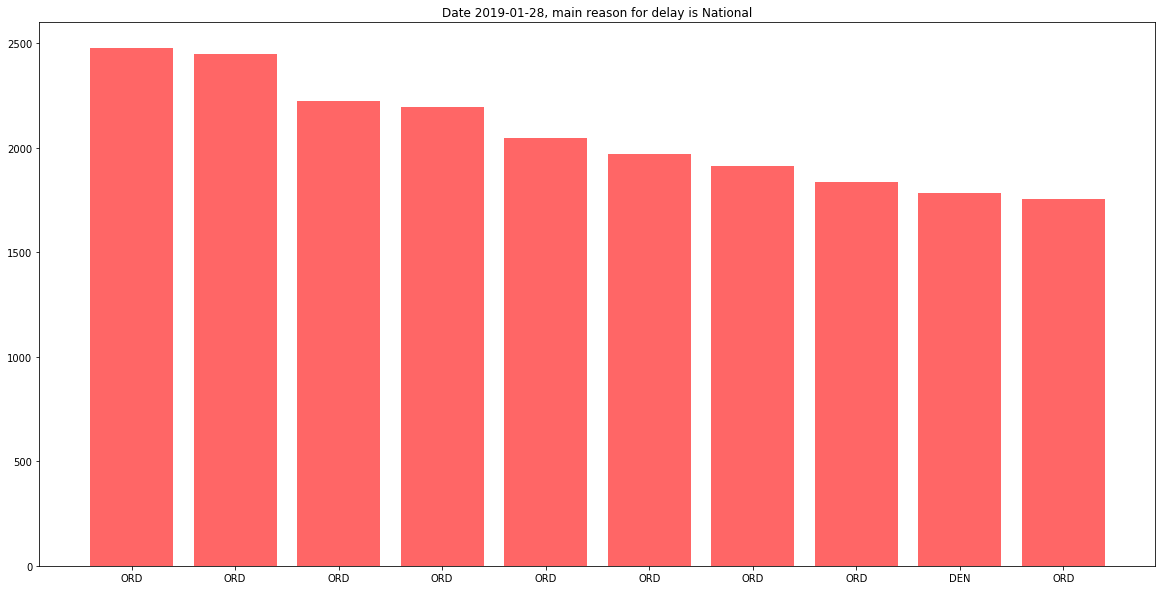

In [63]:
plt.figure(figsize=(20,10))
plt.bar(x_axis, y_axis, color='r', alpha=0.6, align="center")
plt.xticks(tick_location, date_destination_delay_sort_plot['Destination Airport'])
plt.title("Date {}, main reason for delay is {}".format(str(date1.iloc[0]['Date']).split(" ")[0], reason_dest.split(" ")[1]))